In [215]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt


In [216]:
# Load data
df = pd.read_excel('data/Monthly Mastersheet.xlsx')

# Ensure date is datetime and set index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

In [217]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test (Null: non-stationary)
result_adf = adfuller(df['GDP'])
print("ADF p-value:", result_adf[1])

# KPSS Test (Null: stationary)
from statsmodels.tsa.stattools import kpss
result_kpss = kpss(df['GDP'], regression='c')
print("KPSS p-value:", result_kpss[1])


ADF p-value: 0.6825705492402232
KPSS p-value: 0.01


/var/folders/4f/hw3jnnqj605gnnq33z6q3ny00000gn/T/ipykernel_17171/3196527536.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(df['GDP'], regression='c')


In [218]:
# Because GDP is non-stationary, need to difference it
df['GDP_diff'] = df['GDP'].diff().dropna()
fitted_diff = results_high.fittedvalues['GDP_diff']
fitted_level = fitted_diff.cumsum() + df['GDP'].iloc[0]


In [219]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test (Null: non-stationary)
result_adf = adfuller(df['r'])
print("ADF p-value:", result_adf[1])

# KPSS Test (Null: stationary)
from statsmodels.tsa.stattools import kpss
result_kpss = kpss(df['r'], regression='c')
print("KPSS p-value:", result_kpss[1])


ADF p-value: 0.22215361074121293
KPSS p-value: 0.01


/var/folders/4f/hw3jnnqj605gnnq33z6q3ny00000gn/T/ipykernel_17171/1453321110.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(df['r'], regression='c')


In [220]:
# Because r is non-stationary, need to difference it
df['r_diff'] = df['r'].diff().dropna()

In [221]:
threshold_var = df['Bitcoin'].shift(1) # lagged threshold
theta = threshold_var.median()

regime_low = df[threshold_var <= theta]. dropna()
regime_high = df[threshold_var > theta].dropna()

#Select VAR variables
vars_to_model = ['GDP_diff', 'r_diff']

#Fit VAR on low volatility regime
model_low = VAR(regime_low[vars_to_model])
results_low = model_low.fit(maxlags=1)

# Fit VAR on high-volatility regime
model_high = VAR(regime_high[vars_to_model])
results_high = model_high.fit(maxlags=1)

/Users/aliceye/Desktop/CryptoMacroecon-Prediction-CSUREMM/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aliceye/Desktop/CryptoMacroecon-Prediction-CSUREMM/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [222]:
print ("LOW volatility regime:")
print(results_low.summary())

print("HIGH volatility regime:")
print(results_high.summary())

LOW volatility regime:
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 12, Jun, 2025
Time:                     11:31:47
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    10.2962
Nobs:                     39.0000    HQIC:                   10.1321
Log likelihood:          -300.462    FPE:                    22945.1
AIC:                      10.0403    Det(Omega_mle):         19784.3
--------------------------------------------------------------------
Results for equation GDP_diff
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const             -59.776045       110.183148           -0.543           0.587
L1.GDP_diff        -0.254731         0.138619           -1.838           0.066
L1.r_diff        2248.008808       455.543

/var/folders/4f/hw3jnnqj605gnnq33z6q3ny00000gn/T/ipykernel_17171/753619206.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.Series(forecast_high[:,0], index=pd.date_range(start=df.index[-1], periods=5, freq='M')),


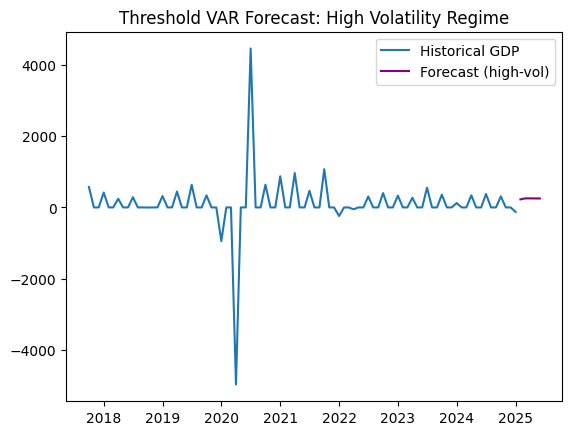

In [223]:
forecast_high = results_high.forecast(y=regime_high[vars_to_model].values[-1:], steps=5)

plt.plot(df['GDP_diff'], label='Historical GDP')
plt.plot(pd.Series(forecast_high[:,0], index=pd.date_range(start=df.index[-1], periods=5, freq='M')),
         label='Forecast (high-vol)', color='purple')
plt.legend()
plt.title("Threshold VAR Forecast: High Volatility Regime")
plt.show()


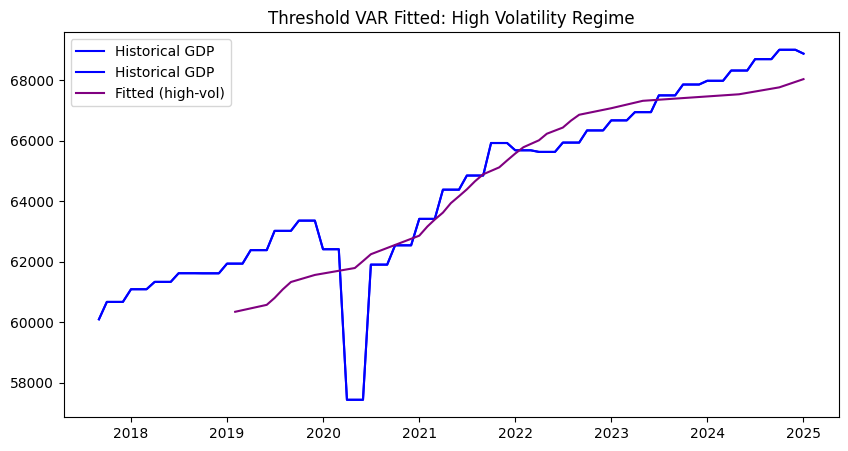

In [224]:
# Historical GDP
plt.figure(figsize=(10, 5))
plt.plot(df['GDP'], label='Historical GDP', color='blue')

# Fitted values from the high-volatility regime
plt.plot(df['GDP'], label='Historical GDP', color='blue')
plt.plot(fitted_level, label='Fitted (high-vol)', color='purple')
plt.title("Threshold VAR Fitted: High Volatility Regime")
plt.legend()
plt.show()



## Training model on 2018-2022 and forecasting 2023-2025

In [225]:
# Split the data into training and testing sets
train = df.loc['2017-09':'2022-01']
test = df.loc['2022-02': '2025-1']

In [226]:
from statsmodels.tsa.api import VAR

data = train[['GDP_diff', 'Bitcoin']].dropna()
model = VAR(data)
results = model.fit(maxlags=1)

forecast = results.forecast(y=train[['GDP_diff', 'Bitcoin']].values[-1:], steps=len(test))



/Users/aliceye/Desktop/CryptoMacroecon-Prediction-CSUREMM/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


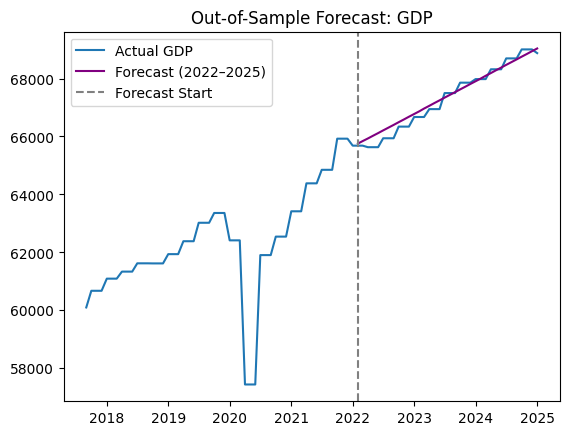

In [227]:
# Extract the GDP forecast (column 0)
forecast_series = pd.Series(forecast[:, 0], index=test.index)

# Starting from the last known actual GDP level
gdp_start = df['GDP'].loc[train.index[-1]]

# Reconstruct GDP forecast from differences
forecast_gdp = forecast_series.cumsum() + gdp_start

# Plot results
import matplotlib.pyplot as plt

plt.plot(df['GDP'], label='Actual GDP')
plt.plot(forecast_gdp, label='Forecast (2022–2025)', color='purple')
plt.axvline(x=pd.to_datetime('2022-02-01'), linestyle='--', color='gray', label='Forecast Start')
plt.title("Out-of-Sample Forecast: GDP")
plt.legend()
plt.show()
